## STUDENT DATA ANALYSIS

In [1]:

import numpy as np
from IPython.display import display
from IPython.display import Markdown as md
from matplotlib import pyplot as plt
import math


In [2]:
marks = np.genfromtxt('Datasets/Student.csv',delimiter=',',skip_header=1)  # Here we are skipping 1st line as it contains str
marks = marks.astype(int)                                                   # Converting the data type of float into int
#np.set_printoptions(threshold=np.inf)                                    # Uncomment to print all the data without truncation


In [3]:
marks = marks*10                                                             # This line should be executed only once in the program execution or it will change values for every iteration

In [4]:
print(marks)                                                                       # To display the data to be accessed/manipulated

[[10 10 10 10 10 10]
 [40 40 30 40 40 40]
 [20 10 30 40 10 10]
 ...
 [30 40 40 20 40 50]
 [20 20 20 50 40 40]
 [30 30 30 50 50 50]]


In [5]:
number_of_students = marks.shape[0]
number_of_subjects = marks.shape[1]

subjects = []

with open('Datasets/Student.csv','r') as fptr:
    header = fptr.readline()
    [subjects.append(i) for i in header.replace('\n','').split(',')]

In [6]:
generate_roll_num = np.arange(1,number_of_students+1)                      # Use arange function  similar to np.array(range(n)) 
new_generate_roll_num = generate_roll_num.reshape(number_of_students,1)    # This is to reshape the elements generated to file shape

In [7]:
new_data = np.hstack([new_generate_roll_num,marks])                         # To append roll number to each row i.e each student similar to zip() in python
print(new_data)

[[  1  10  10 ...  10  10  10]
 [  2  40  40 ...  40  40  40]
 [  3  20  10 ...  40  10  10]
 ...
 [298  30  40 ...  20  40  50]
 [299  20  20 ...  50  40  40]
 [300  30  30 ...  50  50  50]]


In [8]:
#Max num of marks in each subject
#BIOLOGY #GEOLOGY #CHEMISTRY #ALGEBRA #CALCULUS #STATISTICS

print(np.max(new_data[:,1]),np.max(new_data[:,2]),np.max(new_data[:,3]),np.max(new_data[:,4]),np.max(new_data[:,5]),np.max(new_data[:,6]))


50 50 50 50 50 50


In [9]:
print(np.min(new_data[:,1]),np.min(new_data[:,2]),np.min(new_data[:,3]),np.min(new_data[:,4]),np.min(new_data[:,5]),np.min(new_data[:,6]))

10 10 10 10 10 10


### Mean(Average) of each subject

In [10]:
# This is to calculate average(mean) of each subject and to find the subject haing maximum mean.

mean = np.mean(new_data[:,1:],axis=0)  
max_mean = np.max(mean)

max_mean_subjects = []
max_mean_subjects_positions = []
for nditerator in np.where(max_mean == mean)[0]:                                                    # As where returns a tuple object of array,dtype we select [0] index but since there can be more than one max_mean subject we are iterating
    max_mean_subjects.append(subjects[nditerator])
    max_mean_subjects_positions.append(nditerator)
print("Students are good at {} with an average of {}".format(",".join(max_mean_subjects),max_mean))
        

Students are good at CALC with an average of 30.633333333333333


### Top Scorer among the class

In [11]:
sum_of_each_students_marks = np.sum(new_data[:,1:],axis=1)                    # Gives sum of each students marks

highest_students_marks = np.max(sum_of_each_students_marks)                   # Finds the maximum marks out of all student's total marks

result = np.where(sum_of_each_students_marks == highest_students_marks)       # searches who got the max marks(pos) in sum_of_each_student's array marks

for x in np.nditer(result):                                                   # There can be more than one student who got the max marks so use 'for' loop.. as it is numpy array use nd.iterator        
    x = x+1                                                                   # Increment by 1 since.. even though roll num starts with 1.. the 'result' above will return counting from 0
    
# In this data set there is only 1 top scorer and our 1st ranker is Roll number : 242 !!!! Partyyyy!!!!

In [12]:
md("<h4> Hurray!!! The topper/s is : {} </h4>".format(x))

<h4> Hurray!!! The topper/s is : 242 </h4>

## PLOT ANALYSIS

BAR PLOT :

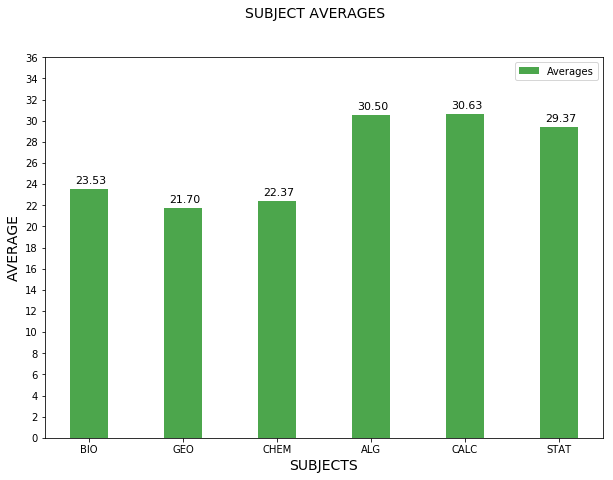

In [13]:

fig, axes = plt.subplots(figsize=(10,7))

fig.suptitle("SUBJECT AVERAGES",fontsize=14)


a = axes.bar(range(len(subjects)), mean, alpha=0.7, width=0.4, align='center', facecolor='green',)


# X-AXIS

axes.set_xlabel('SUBJECTS',fontsize=14)
axes.set_xticks(range(len(subjects)))
axes.set_xticklabels(subjects)

# Y- AXIS

axes.set_ylabel('AVERAGE',fontsize=14)
axes.set_yticks(range(0,int(math.ceil(max_mean+(0.2*max_mean))),2))    # 0.2 here is just to have a good scale for visual

# To set reading value of X against Y on top of bars

for index,value in enumerate(mean):
    axes.text(x=index-0.3/2,y=value+0.5,s=("%.2f"%(value)),fontsize=11)


# LEGEND    
    
axes.legend(["Averages"],loc = 1)



PIE CHART

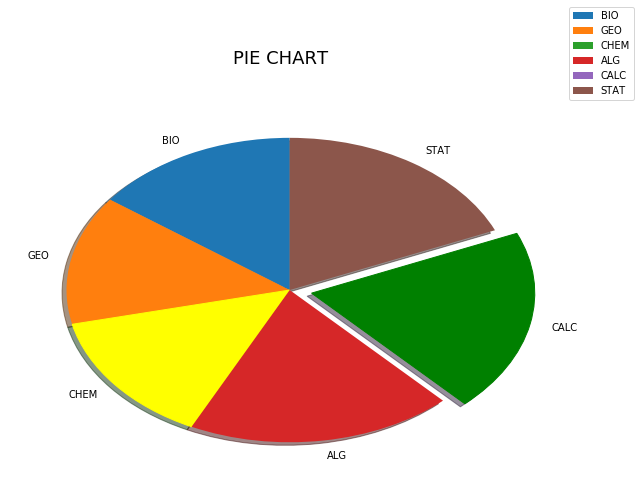

In [14]:
fig,axes = plt.subplots(figsize=(10,7))

fig.suptitle("PIE CHART",fontsize=18)

#explode
sectors_to_explode = np.zeros(len(subjects))                                            # [0. 0. 0. 0. 0. 0.]

for pos in max_mean_subjects_positions:                                                 # Explode will make sector seperate from circle
    sectors_to_explode[pos]=0.1

sector_labels=subjects
    
n = axes.pie(mean,explode=sectors_to_explode,labels=subjects,shadow=True,startangle=90,)
axes.legend(sector_labels,loc=(1,1))                                                    # Here location is like X,Y coordinates in the graph i.e hre X=1;Y=1

n[0][4].set_color('green')               
n[0][2].set_color('yellow')

## STUDENT PERFORMANCE ANALYSIS

In [15]:
median_set = np.median(new_data[:,1:],axis=0)
mean_set   = np.mean(new_data[:,1:],axis=0)

In [16]:
diff = mean_set - median_set
diff                                                    # Negative out liers indicates there are a lot of students, poor in the subject

array([ 3.53333333,  1.7       ,  2.36666667,  0.5       ,  0.63333333,
       -0.63333333])

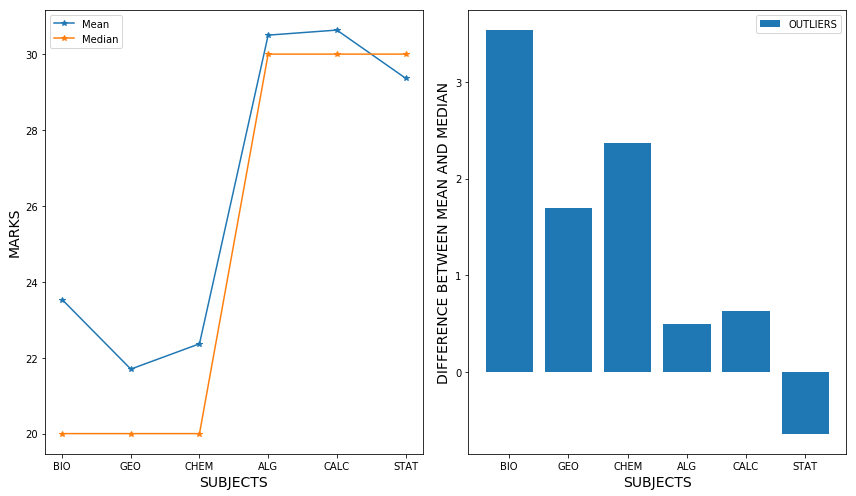

In [17]:

fig,axes = plt.subplots(1,2,figsize=(12,7))

#Subplot (1,1)

axes[0].plot(range(len(subjects)),mean_set,marker='*')
axes[0].plot(range(len(subjects)),median_set,marker='*')

axes[0].set_xticks(range(len(subjects)))
axes[0].set_xticklabels(subjects)
axes[0].set_xlabel("SUBJECTS",fontsize=14)
axes[0].set_ylabel("MARKS",fontsize=14)
axes[0].legend(["Mean","Median"])


#Subplot (1,2)

axes[1].bar(range(6),diff)

axes[1].set_xticks(range(len(subjects)))
axes[1].set_xticklabels(subjects)
axes[1].set_xlabel("SUBJECTS",fontsize=14)
axes[1].set_ylabel("DIFFERENCE BETWEEN MEAN AND MEDIAN",fontsize=14)
axes[1].legend(["OUTLIERS"])

fig.tight_layout()

#### From the graphs above it is clear that Biology has the highest difference between mean and median.. which means there are outliers i.e extreme points
#### But as the difference is positive which means on an average there are lot of bright students or an extremely bright student in Biology.
#### The negative bar in subplot-2 indicates there are people who are yet to be improved to reach average people in STATISTICS SUBJECT. i.e more negative outliers in STATISTICS
#### But on an average All people are relatively good at CALCULUS as calculated previously 

In [18]:
# Observe here.. take Biology as example here... as we can see median is 20 i.e 1st half of the students are below '20' mark only..
# but there are some bright students(in statistical words.. outliers) in 2nd half who made average mark greater than the median..  

print(np.mean(new_data[:,1],axis=0),np.median(new_data[:,1],axis=0))        # here first column mean for Biology

# Observe here.. take Statistics as example here... as we can see median is 30 i.e 1st half of the students are below '30' mark..
# but there are some dull students(i.e in statistical words.. outliers) in 2nd half who made average mark lesser than the median..  

print(np.mean(new_data[:,-1],axis=0),np.median(new_data[:,-1],axis=0))       # here first column mean for Statistics


23.533333333333335 20.0
29.366666666666667 30.0


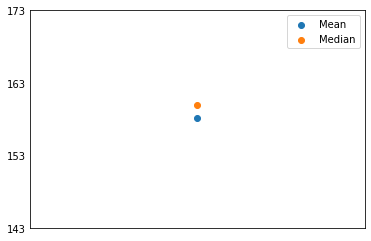

In [19]:
Mean_of_sum_of_all_students=np.mean(np.sum(new_data[:,1:],axis=1))
Median_of_sum_of_all_students=np.median(np.sum(new_data[:,1:],axis=1))

fig,axes = plt.subplots()

a = axes.scatter(1,Mean_of_sum_of_all_students)
axes.scatter(1,Median_of_sum_of_all_students)

axes.set_xticks(range(3))

y_lower = int(min(Mean_of_sum_of_all_students,Median_of_sum_of_all_students))
y_upper = int(max(Mean_of_sum_of_all_students,Median_of_sum_of_all_students))

axes.set_yticks(range(y_lower-int(y_lower/10), y_upper+int(y_upper/10),10))


plt.setp(axes.get_xticklabels(), visible=False)
axes.tick_params(axis='both', which='both', length=0)

axes.legend(["Mean","Median"])

##### Here we can see the orange(median) is slightly above mean(Blue) 
#### Which means even though there are individual above average performance in few subjects..
#### There are few overall dull performers pulling down the average i.e slightly more dull performers than the top performers  

In [20]:
#Draw scatter plot of each student marks against total marks.. to visualize the outliers
#Draw fill between plots of ordered mean,ordered median and standard deviation
#Draw Cumilative Distribution function for getting a clear picture of % of students above/below a certain marks  doubt - (x axis - ordered mean of each student,y axis - percentage/value of sudents)
    #Sort marks of 300 studnts as X Axis... Y axis - marks/mean etc..
    #this X axis can be converted/interpreted into percentage now...
    #Now change the axis you will get cumilative distribuitive function
# Draw normal distribution curve


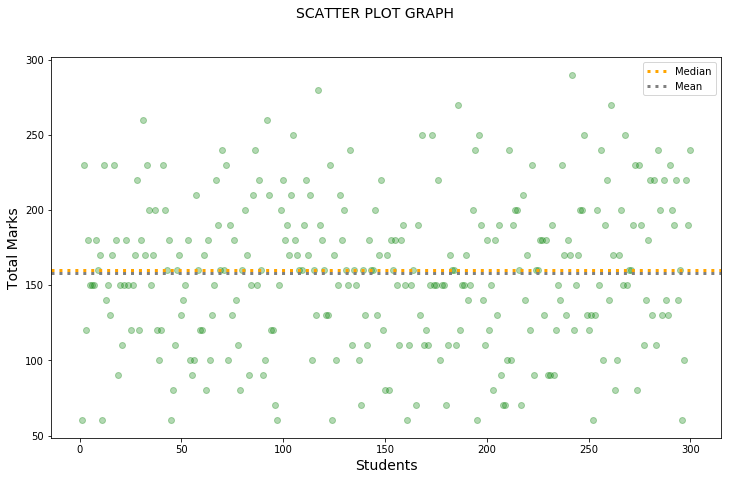

In [21]:
fig,axes = plt.subplots(figsize=(12,7))

fig.suptitle("SCATTER PLOT GRAPH",fontsize=14)
axes.scatter(new_data[:,0],np.sum(new_data[:,1:],axis=1),color='green',alpha=0.3)
axes.set_xlabel("Students",fontsize=14)
axes.set_ylabel("Total Marks",fontsize=14)
axes.axhline(Median_of_sum_of_all_students,color='orange',lw=3,linestyle=':')
axes.axhline(Mean_of_sum_of_all_students,color='grey',lw=3,linestyle=':')
axes.legend(["Median","Mean"])

##### We can observe that there are nearly equal num of students above & below the line 'median' (orange) line but slightly more below the line which means slightly more number of dull students, which makes the mean go little less than median.(tilted towards left skew in normal distribution)

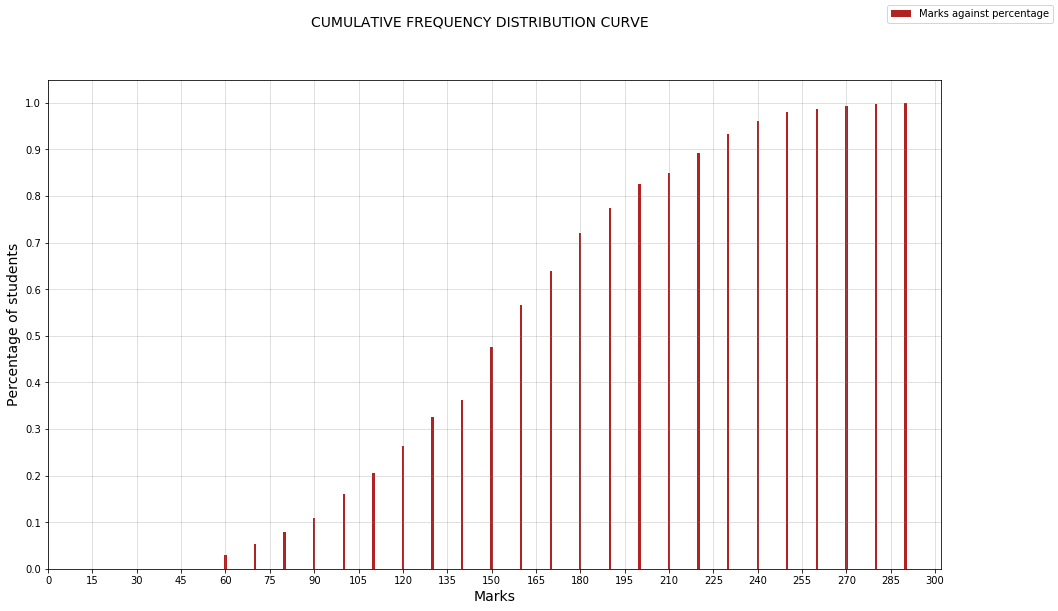

In [22]:
fig,axes = plt.subplots(figsize=(16,9))
res = axes.bar(np.sort(np.sum(new_data[:,1:],axis=1)),np.arange(1,number_of_students+1)/number_of_students,color='firebrick',align='center')
axes.grid(zorder=1,color='grey',alpha=0.3)
axes.set_xticks(np.arange(0,number_of_students+1,15))
axes.set_yticks(np.arange(0,number_of_students+1,30)/number_of_students)

#axes.set_xticks(np.sum(new_data[:,1:],axis=1))

axes.set_xlabel("Marks",fontsize=14)
axes.set_ylabel("Percentage of students",fontsize=14)

fig.suptitle("CUMULATIVE FREQUENCY DISTRIBUTION CURVE",fontsize=14)
fig.legend(["Marks against percentage"],loc=1)





##### This above plot cumilative distribution curve give the marks against percentage of students
##### i.e We can interpret % of students who got below 150 marks by calculating percentage scale from below (or) 
##### We can interpret % of students who got above 150 marks by calculating percentage scale from below 
                                        (or)
##### We can interpret number of marks 75% of students got  by drawing intercepts



### NORMAL DISTRIBUTION CURVE

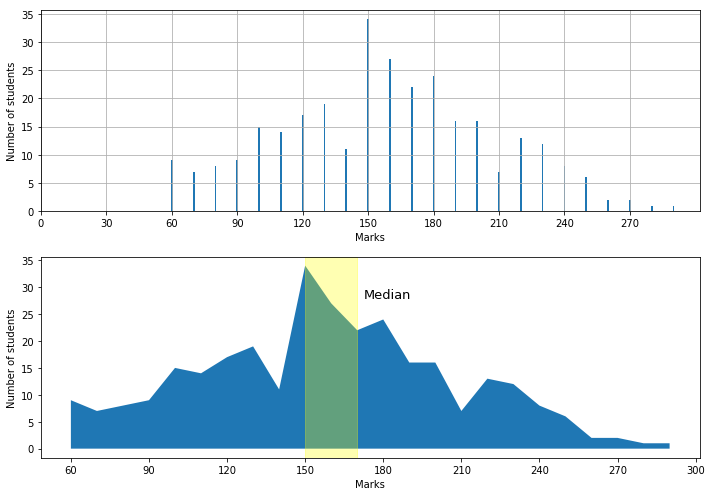

In [176]:
import collections
fig, axes = plt.subplots(2,1,figsize = (10,7))
x = np.unique(np.sum(new_data[:,1:],axis=1))
y = np.array(list(collections.Counter(sorted(np.sum(new_data[:,1:],axis=1))).values()))

axes[0].bar(x,y)
axes[0].set_xticks(range(0,number_of_students,30))
axes[0].set_xlabel("Marks",fontsize=10)
axes[0].set_ylabel("Number of students",fontsize=10)
axes[0].grid(zorder=0)


axes[1].fill_between(x,y)
axes[1].set_xticks(range(0,number_of_students+1,30))
axes[1].set_xlabel("Marks",fontsize=10)
axes[1].set_ylabel("Number of students",fontsize=10)

#axes[1].axvspan(Mean_of_sum_of_all_students-10,Mean_of_sum_of_all_students+10,color='green',alpha=0.3)
axes[1].axvspan(Median_of_sum_of_all_students-10,Median_of_sum_of_all_students+10,color='yellow',alpha=0.3)
fig.text(0.51,0.40,s="Median",fontsize=13)

fig.tight_layout()

fig.savefig("abc.png")

The Above graph represents number of outliers and also give how many students got corresponding marks. For example..  
  Around 9 students got 60 marks.<br>
  Majority of students got 150 marks i.e around 34.
  

OBSERVATIONS :

The above Distribution curve shows the data is near to NORMAL DISTRIBUTION CURVE..
Number of outliers are less(Compared to number of students in average)
Hence the Mean and median are near as calculated above

The graph is little tilted towards the left i.e left skewed distribution which shows mean will be less than median
